In [1]:
from qiskit import QuantumCircuit, Aer, transpile
from numpy import pi

In [3]:
def qft(qc):
 for i in range(qc.num_qubits - 1, -1, -1):
     qc.h(i)
     for j in range(i - 1, -1, -1):
         qc.cp(pi / 2 ** (i - j), j, i)
 for i in range(qc.num_qubits // 2):
     qc.swap(i, qc.num_qubits - i - 1)
 return qc

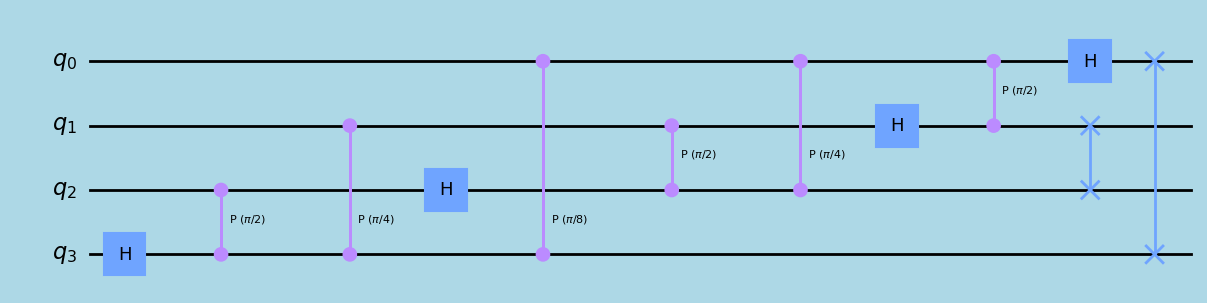

In [14]:
n_qubits = 4
qc = QuantumCircuit(n_qubits)
qc = qft(qc)
style = {'backgroundcolor': 'lightblue'}
qc.draw("mpl", style=style)
#print(qc)

In [5]:
backend = Aer.get_backend('statevector_simulator')
tqc = transpile(qc, backend)
job = backend.run(tqc)
sv = job.result().get_statevector(tqc)
sv.draw('latex')

<IPython.core.display.Latex object>